In [1]:
import pandas as pd
import yfinance as yf

In [2]:
df=yf.download("HCLTECH.NS",start="2005-10-22",end=None)
df

C:\Users\jeeva\AppData\Local\Temp\ipykernel_11904\2758782433.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download("HCLTECH.NS",start="2005-10-22",end=None)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,HCLTECH.NS,HCLTECH.NS,HCLTECH.NS,HCLTECH.NS,HCLTECH.NS
Date,,,,,
2005-10-24,34.677708,35.449759,34.104053,35.065272,3608888
2005-10-25,36.400215,36.826228,33.493489,34.104056,8602616
2005-10-26,34.985294,36.400208,34.603883,36.400208,5793488
2005-10-27,32.363083,34.988365,31.694076,34.988365,29695968
2005-10-28,32.209290,33.565763,30.932793,32.296954,7611136
...,...,...,...,...,...
2025-09-23,1429.800049,1444.199951,1420.400024,1444.199951,3106480
2025-09-24,1442.300049,1444.699951,1420.000000,1425.099976,2894044


In [3]:
df.columns

MultiIndex([( 'Close', 'HCLTECH.NS'),
            (  'High', 'HCLTECH.NS'),
            (   'Low', 'HCLTECH.NS'),
            (  'Open', 'HCLTECH.NS'),
            ('Volume', 'HCLTECH.NS')],
           names=['Price', 'Ticker'])

In [4]:
df.columns=['_'.join(col).strip() for col in df.columns.values]

In [5]:
df.columns

Index(['Close_HCLTECH.NS', 'High_HCLTECH.NS', 'Low_HCLTECH.NS',
       'Open_HCLTECH.NS', 'Volume_HCLTECH.NS'],
      dtype='object')

In [6]:
dataset=df['Close_HCLTECH.NS'].values

In [7]:
dataset

array([  34.67770767,   36.40021515,   34.98529434, ..., 1423.80004883,
       1395.30004883, 1384.80004883], shape=(4919,))

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
data=MinMaxScaler(feature_range=(0,1))

In [12]:
dataset=dataset.reshape(-1,1) # participant scope

In [13]:
dataset

array([[  34.67770767],
       [  36.40021515],
       [  34.98529434],
       ...,
       [1423.80004883],
       [1395.30004883],
       [1384.80004883]], shape=(4919, 1))

In [14]:
scaled_dataset=data.fit_transform(dataset)
scaled_dataset

array([[0.00979156],
       [0.01068493],
       [0.00995109],
       ...,
       [0.73024837],
       [0.71546708],
       [0.71002135]], shape=(4919, 1))

In [15]:
train_data=scaled_dataset[0:4000,:]

In [16]:
train_data

array([[0.00979156],
       [0.01068493],
       [0.00995109],
       ...,
       [0.56715499],
       [0.56606275],
       [0.59082783]], shape=(4000, 1))

In [17]:
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [18]:
x_train[0]

array([0.00979156, 0.01068493, 0.00995109, 0.0085911 , 0.00851134,
       0.0086861 , 0.00940928, 0.00940928, 0.00964686, 0.01046026,
       0.01021624, 0.01044817, 0.01109003, 0.01071797, 0.01177295,
       0.0117649 , 0.01143472, 0.01191389, 0.01176893, 0.01209509,
       0.01146693, 0.01234233, 0.01214099, 0.01248728, 0.01228595,
       0.0124736 , 0.01298661, 0.0129423 , 0.01316384, 0.01314924,
       0.01291391, 0.01309487, 0.01320037, 0.01357367, 0.01388773,
       0.01379034, 0.0137238 , 0.01414172, 0.01373353, 0.01352659,
       0.01350063, 0.01313544, 0.01291228, 0.012991  , 0.01305834,
       0.01330748, 0.01368079, 0.01367105, 0.01410927, 0.01421639,
       0.01464081, 0.01559841, 0.01557812, 0.01543205, 0.01572013,
       0.01591246, 0.0155554 , 0.01535088, 0.01516993, 0.01569742])

In [19]:
y_train[0]

np.float64(0.01635718745162245)

In [20]:
x_train[1]

array([0.01068493, 0.00995109, 0.0085911 , 0.00851134, 0.0086861 ,
       0.00940928, 0.00940928, 0.00964686, 0.01046026, 0.01021624,
       0.01044817, 0.01109003, 0.01071797, 0.01177295, 0.0117649 ,
       0.01143472, 0.01191389, 0.01176893, 0.01209509, 0.01146693,
       0.01234233, 0.01214099, 0.01248728, 0.01228595, 0.0124736 ,
       0.01298661, 0.0129423 , 0.01316384, 0.01314924, 0.01291391,
       0.01309487, 0.01320037, 0.01357367, 0.01388773, 0.01379034,
       0.0137238 , 0.01414172, 0.01373353, 0.01352659, 0.01350063,
       0.01313544, 0.01291228, 0.012991  , 0.01305834, 0.01330748,
       0.01368079, 0.01367105, 0.01410927, 0.01421639, 0.01464081,
       0.01559841, 0.01557812, 0.01543205, 0.01572013, 0.01591246,
       0.0155554 , 0.01535088, 0.01516993, 0.01569742, 0.01635719])

In [21]:
y_train[1]

np.float64(0.01562843314794201)

In [22]:
type(x_train)

list

In [24]:
import numpy as np

In [25]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [26]:
x_train.shape

(3940, 60)

In [27]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) # if hard code -inside the square bracket[3940,60,1]

In [28]:
x_train.shape

(3940, 60, 1)

In [29]:
x_train[0]

array([[0.00979156],
       [0.01068493],
       [0.00995109],
       [0.0085911 ],
       [0.00851134],
       [0.0086861 ],
       [0.00940928],
       [0.00940928],
       [0.00964686],
       [0.01046026],
       [0.01021624],
       [0.01044817],
       [0.01109003],
       [0.01071797],
       [0.01177295],
       [0.0117649 ],
       [0.01143472],
       [0.01191389],
       [0.01176893],
       [0.01209509],
       [0.01146693],
       [0.01234233],
       [0.01214099],
       [0.01248728],
       [0.01228595],
       [0.0124736 ],
       [0.01298661],
       [0.0129423 ],
       [0.01316384],
       [0.01314924],
       [0.01291391],
       [0.01309487],
       [0.01320037],
       [0.01357367],
       [0.01388773],
       [0.01379034],
       [0.0137238 ],
       [0.01414172],
       [0.01373353],
       [0.01352659],
       [0.01350063],
       [0.01313544],
       [0.01291228],
       [0.012991  ],
       [0.01305834],
       [0.01330748],
       [0.01368079],
       [0.013

In [31]:
pip install tensorflow

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 778.1 kB/s eta 0:07:07
   ---------------------------------------- 0.8/332.0 MB 791.1 kB/s eta 0:06:59
   ---------------------------------------- 0.8/332.0 MB 791.1 kB/s eta 0:06:59
   ---------------------------------------- 1.0/332.0 MB 799.1 kB/s eta 0:06:55
   ---------------------------------------- 1.0/332.0 MB 799.1 kB/s eta 0:06:55
   ---------------------------------------- 1.3/332.0 MB 750.3 kB/s eta 0:07:21
   ---------------------------------------- 1.3/332.0 MB 750.3 kB/s eta 0:07:21
   ----------------------

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [33]:
model=Sequential()
model.add(LSTM(100,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer="adam")

d:\DATA SCIENCE\CODE\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,301 (282.43 KB)

 Trainable params: 72,301 (282.43 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
result=model.fit(x_train,y_train,epochs=5,batch_size=1)

Epoch 1/5
3940/3940 ━━━━━━━━━━━━━━━━━━━━ 57s 14ms/step - loss: 2.9475e-04
Epoch 2/5
3940/3940 ━━━━━━━━━━━━━━━━━━━━ 54s 14ms/step - loss: 1.3448e-04
Epoch 3/5
3940/3940 ━━━━━━━━━━━━━━━━━━━━ 59s 15ms/step - loss: 8.1521e-05
Epoch 4/5
3940/3940 ━━━━━━━━━━━━━━━━━━━━ 54s 14ms/step - loss: 6.8026e-05
Epoch 5/5
3940/3940 ━━━━━━━━━━━━━━━━━━━━ 55s 14ms/step - loss: 5.6083e-05


In [36]:
units=100

In [37]:
4*((units*1)+(units*units)+units)

40800

In [38]:
test_data=scaled_dataset[4000:,:]

In [39]:
x_test=[]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [40]:
x_test

[array([0.59461717, 0.58663704, 0.58795225, 0.55297793, 0.53559109,
        0.52642958, 0.520203  , 0.51687611, 0.49752249, 0.49698305,
        0.47632542, 0.47753927, 0.48605862, 0.50107407, 0.51822501,
        0.51184111, 0.51501066, 0.51211094, 0.51417885, 0.52269814,
        0.52694664, 0.51496565, 0.50721062, 0.51714595, 0.51680888,
        0.51467344, 0.51554994, 0.51543769, 0.50860431, 0.51015527,
        0.48567645, 0.49968041, 0.49844411, 0.49331916, 0.50417595,
        0.50361397, 0.51069474, 0.52018059, 0.52350741, 0.52775569,
        0.52834011, 0.53256604, 0.52087745, 0.53106   , 0.52989122,
        0.51692129, 0.52067514, 0.52260824, 0.52773328, 0.52200128,
        0.51507803, 0.51676383, 0.51563985, 0.51498819, 0.51764059,
        0.52546308, 0.52923944, 0.5180227 , 0.51928148, 0.5157074 ]),
 array([0.58663704, 0.58795225, 0.55297793, 0.53559109, 0.52642958,
        0.520203  , 0.51687611, 0.49752249, 0.49698305, 0.47632542,
        0.47753927, 0.48605862, 0.50107407, 0.

In [41]:
y_test=dataset[4000:,:]

In [42]:
type(x_test)

list

In [43]:
x_test=np.array(x_test)

In [44]:
type(x_test)

numpy.ndarray

In [45]:
x_test.shape

(859, 60)

In [46]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [47]:
x_test.shape

(859, 60, 1)

In [48]:
predict=model.predict(x_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [49]:
y_pred=data.inverse_transform(predict)
y_pred

array([[ 993.5195 ],
       [ 970.02985],
       [ 969.25055],
       [ 963.53375],
       [ 945.59973],
       [ 922.41736],
       [ 936.5216 ],
       [ 941.16437],
       [ 942.29346],
       [ 932.94684],
       [ 936.6024 ],
       [ 936.8049 ],
       [ 947.6808 ],
       [ 936.8325 ],
       [ 928.3332 ],
       [ 911.94196],
       [ 932.53766],
       [ 913.8744 ],
       [ 934.3843 ],
       [ 930.02136],
       [ 921.8485 ],
       [ 921.2478 ],
       [ 915.49817],
       [ 909.75256],
       [ 938.4717 ],
       [ 929.51416],
       [ 882.46625],
       [ 899.5923 ],
       [ 888.9931 ],
       [ 868.8351 ],
       [ 855.9238 ],
       [ 859.76794],
       [ 875.4953 ],
       [ 900.9924 ],
       [ 900.5567 ],
       [ 884.5554 ],
       [ 902.41754],
       [ 903.7506 ],
       [ 899.78186],
       [ 889.4924 ],
       [ 895.53644],
       [ 893.7063 ],
       [ 883.7887 ],
       [ 866.5473 ],
       [ 870.7237 ],
       [ 864.2847 ],
       [ 845.3346 ],
       [ 840.

In [50]:
df1=df[['Close_HCLTECH.NS']].iloc[-859:].copy()

In [51]:
df1

,Close_HCLTECH.NS
Date,
2022-04-11,982.532593
2022-04-12,980.495789
2022-04-13,975.251465
2022-04-18,955.011536
2022-04-19,927.706726
...,...
2025-09-23,1429.800049
2025-09-24,1442.300049
2025-09-25,1423.800049


In [52]:
df1["prediction"]=y_pred.flatten()

In [53]:
df1

,Close_HCLTECH.NS,prediction
Date,,
2022-04-11,982.532593,993.519470
2022-04-12,980.495789,970.029846
2022-04-13,975.251465,969.250549
2022-04-18,955.011536,963.533752
2022-04-19,927.706726,945.599731
...,...,...
2025-09-23,1429.800049,1392.488159
2025-09-24,1442.300049,1385.622681
2025-09-25,1423.800049,1395.947754


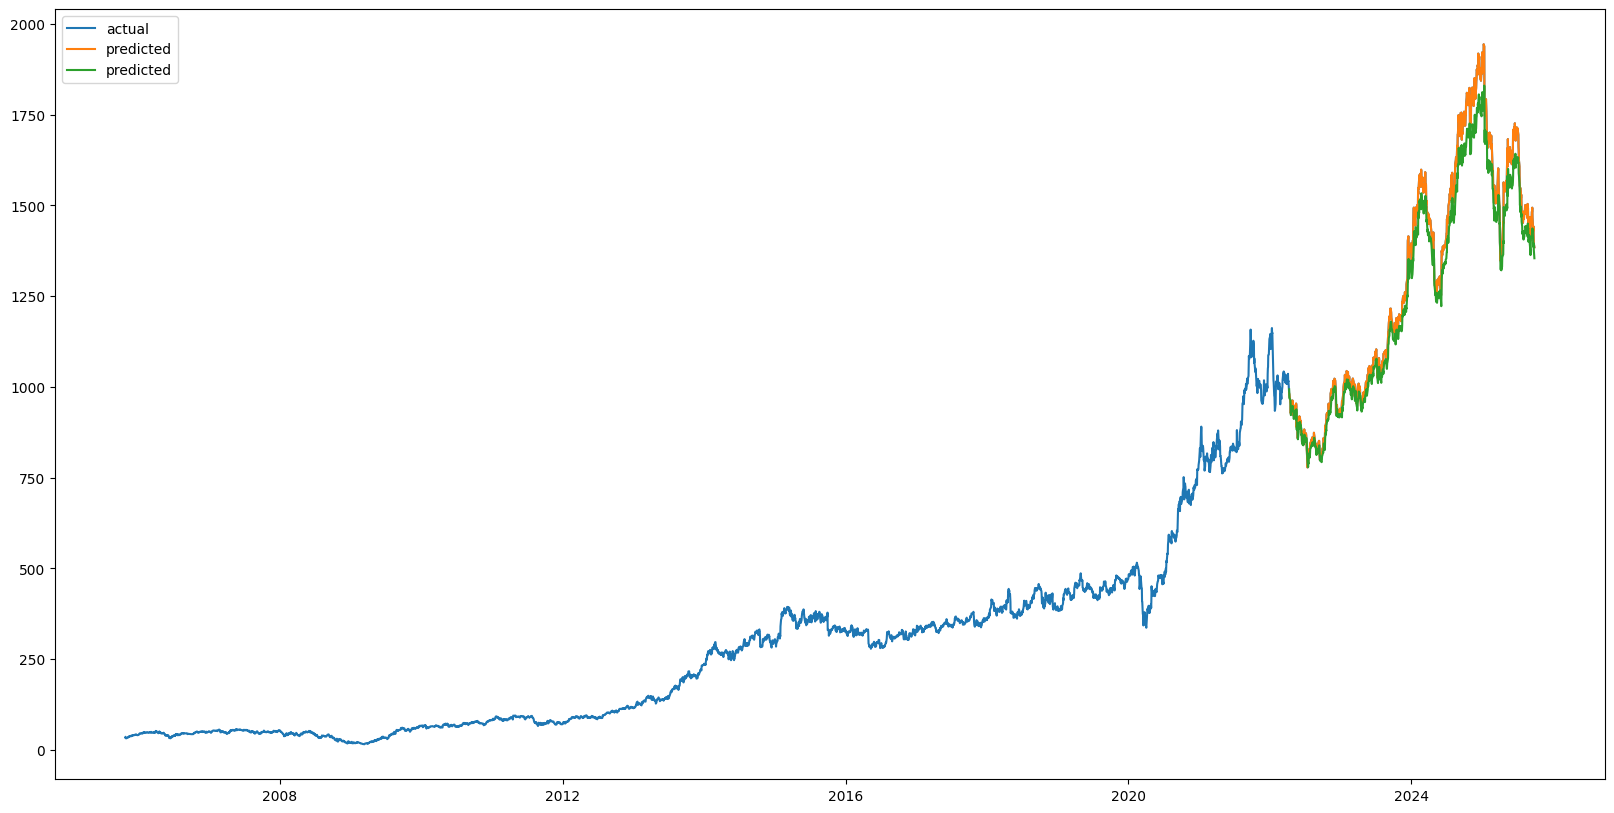

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df["Close_HCLTECH.NS"],label="actual")
plt.plot(df1[["Close_HCLTECH.NS","prediction"]],label="predicted")
plt.legend()
plt.show()

In [55]:
df[["Close_HCLTECH.NS"]].iloc[-60:]

,Close_HCLTECH.NS
Date,
2025-07-07,1697.105957
2025-07-08,1694.823730
2025-07-09,1660.988770
2025-07-10,1650.768799
2025-07-11,1625.566406
2025-07-14,1607.210205
2025-07-15,1554.225220
2025-07-16,1550.653198
2025-07-17,1531.900024


In [56]:
tomorrow=[]
tomorrow.append(df[["Close_HCLTECH.NS"]].iloc[-60:].values)

In [57]:
scaled_tomorrow=data.transform(tomorrow[0])

In [58]:
scaled_tomorrow

array([[0.87199622],
       [0.87081256],
       [0.85326434],
       [0.84796384],
       [0.83489282],
       [0.82537253],
       [0.79789231],
       [0.79603971],
       [0.78631353],
       [0.79507859],
       [0.78553557],
       [0.78019353],
       [0.7852244 ],
       [0.77350304],
       [0.76463428],
       [0.75218688],
       [0.75545435],
       [0.75758077],
       [0.75312046],
       [0.7449259 ],
       [0.75649163],
       [0.76079632],
       [0.75068281],
       [0.75706212],
       [0.75716583],
       [0.76354515],
       [0.76930206],
       [0.77033934],
       [0.76447873],
       [0.76198922],
       [0.7573733 ],
       [0.76769428],
       [0.76639768],
       [0.75229065],
       [0.77194712],
       [0.76603465],
       [0.76603465],
       [0.74373306],
       [0.74632627],
       [0.75337978],
       [0.75197941],
       [0.75218688],
       [0.74036189],
       [0.72775887],
       [0.7194606 ],
       [0.73195985],
       [0.75104589],
       [0.753

In [59]:
scaled_tomorrow.shape

(60, 1)

In [60]:
scaled_tomorrow=scaled_tomorrow.reshape(1,60,1)

In [61]:
tomorrow_price=model.predict(scaled_tomorrow)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [62]:
tomorrow_actual=data.inverse_transform(tomorrow_price)
tomorrow_actual

array([[1347.1224]], dtype=float32)